In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [47]:
excelfile = pd.ExcelFile('/content/TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx')

In [48]:
exist = excelfile.parse("Existing employees")
left = excelfile.parse("Employees who have left")

In [49]:
exist.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [50]:
left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [51]:
left['promotion_last_5years'] = left['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
exist['promotion_last_5years'] = exist['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
left['Work_accident'] = left['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")
exist['Work_accident'] = exist['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")

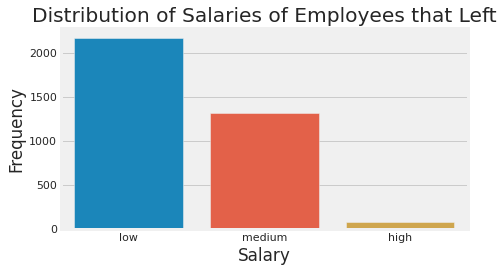

In [52]:
plt.figure(figsize=(7,4))
plt.style.use('fivethirtyeight')
sns.countplot(left['salary'])
plt.title("Distribution of Salaries of Employees that Left")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

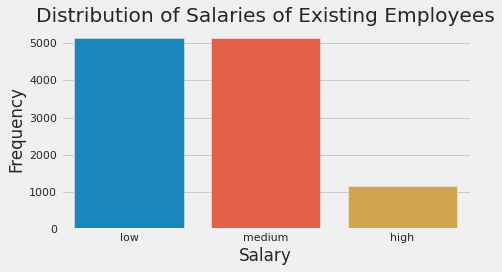

In [53]:
plt.figure(figsize=(7,4))
plt.style.use('fivethirtyeight')
sns.countplot(exist['salary'])
plt.title("Distribution of Salaries of Existing Employees")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

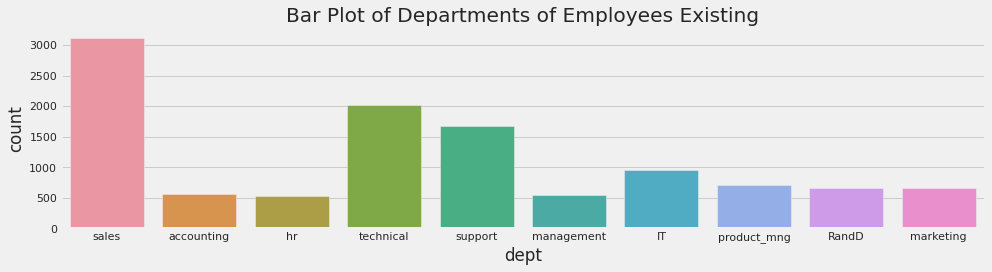

In [54]:
plt.figure(figsize=(14,4))
sns.countplot(exist['dept'])
plt.title("Bar Plot of Departments of Employees Existing")
plt.tight_layout()

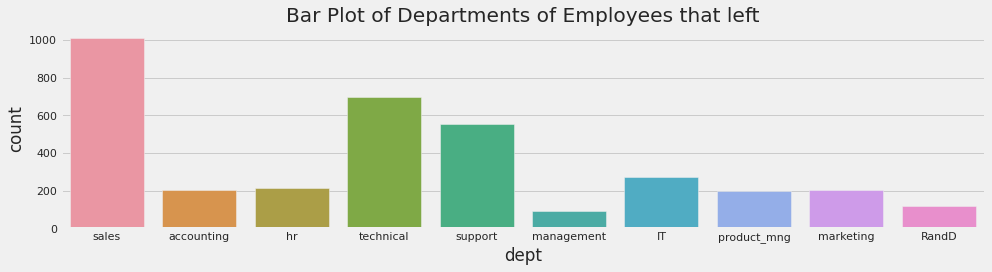

In [55]:
plt.figure(figsize=(14,4))
sns.countplot(left['dept'])
plt.title("Bar Plot of Departments of Employees that left")
plt.tight_layout()

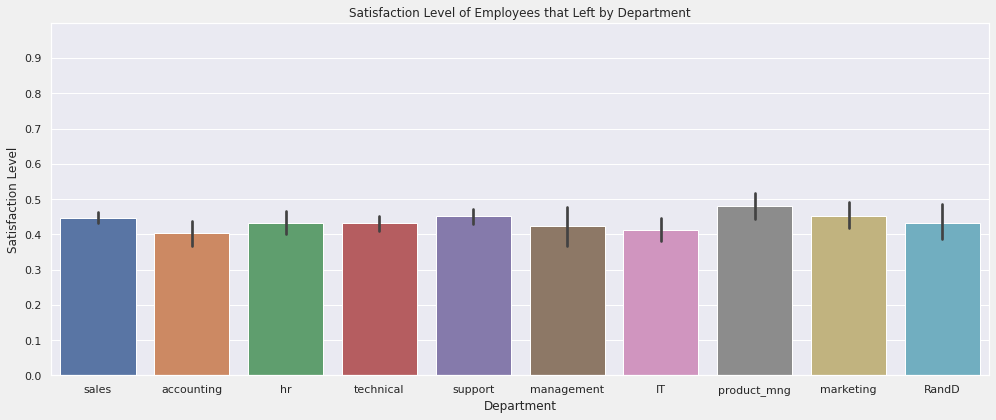

In [56]:
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='satisfaction_level',data=left)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Satisfaction Level of Employees that Left by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()

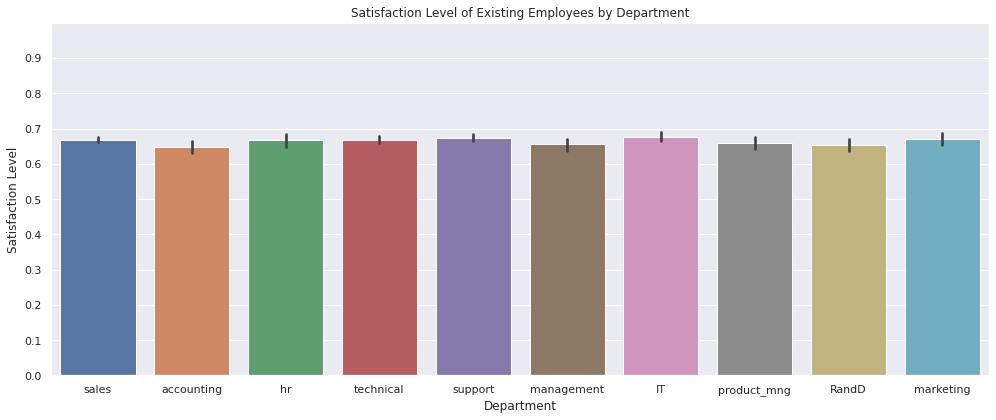

In [57]:
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='satisfaction_level',data=exist)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Satisfaction Level of Existing Employees by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()

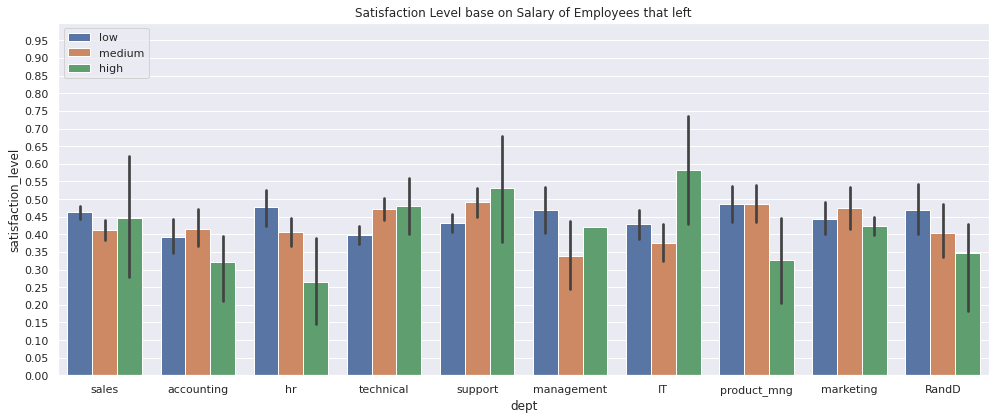

In [58]:
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='satisfaction_level',hue='salary',data=left)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title("Satisfaction Level base on Salary of Employees that left")
plt.tight_layout()
plt.legend(loc=2)

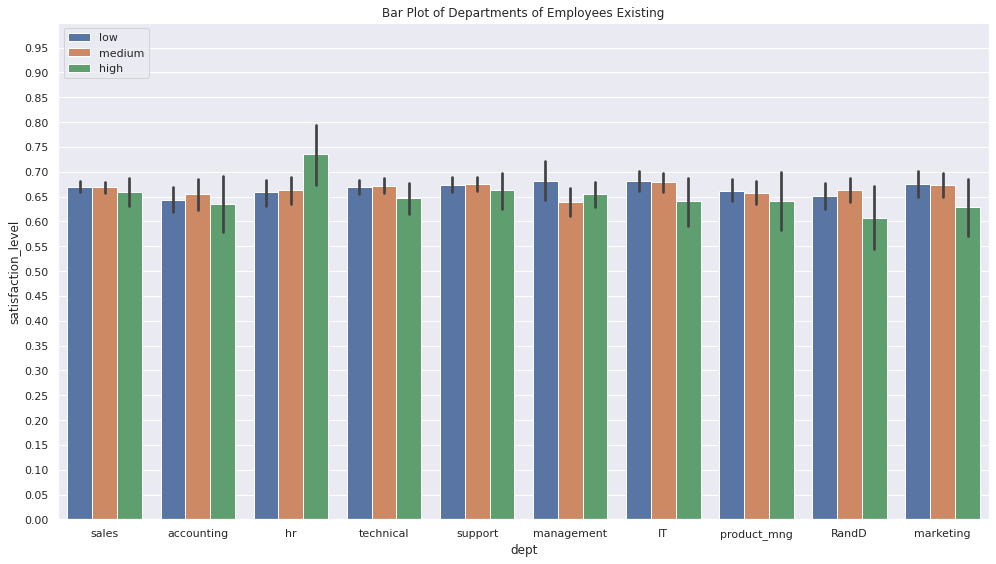

In [59]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='satisfaction_level',hue='salary',data=exist)
plt.title("Bar Plot of Departments of Employees Existing")
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

In [60]:
# To determine the percentage of employees that left had a satisfaction level < 45
(len(left[left['satisfaction_level']<0.45])/len(left)) * 100

64.57574908989079

In [61]:
(left[left['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True))*100

No     99.566349
Yes     0.433651
Name: promotion_last_5years, dtype: float64

In [62]:
#To determine the Salary proportion of Employees with less than 45% Satisfaction level
(left[left['satisfaction_level']<0.45]['salary'].value_counts(normalize=True))*100

low       60.754553
medium    37.120555
high       2.124892
Name: salary, dtype: float64

In [63]:
#To determine the mean satisfaction level of employeees that exist
exist['satisfaction_level'].mean()*100

66.6809590479516

In [64]:
print (str((len(exist[exist['satisfaction_level']<0.45])/len(exist)) * 100) + '%' + ' of employees that exist have satisfaction level less than 45%')

exist[exist['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True)*100

13.816940847042353% of employees that exist have satisfaction level less than 45%


No     97.720076
Yes     2.279924
Name: promotion_last_5years, dtype: float64

In [65]:
#To determine the mean and median last evaluation of both employees to determine any pattern
left['last_evaluation'].median(), left['last_evaluation'].mean()

(0.79, 0.7181125735088183)

In [66]:
exist['last_evaluation'].median(),exist['last_evaluation'].mean()

(0.71, 0.7154733986699274)

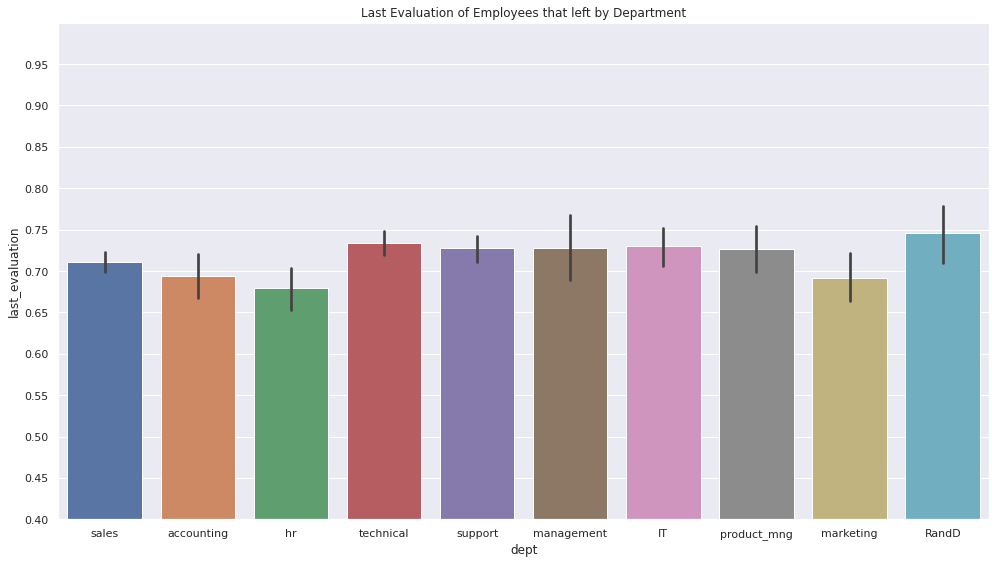

In [67]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='last_evaluation',data=left)
plt.title("Last Evaluation of Employees that left by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

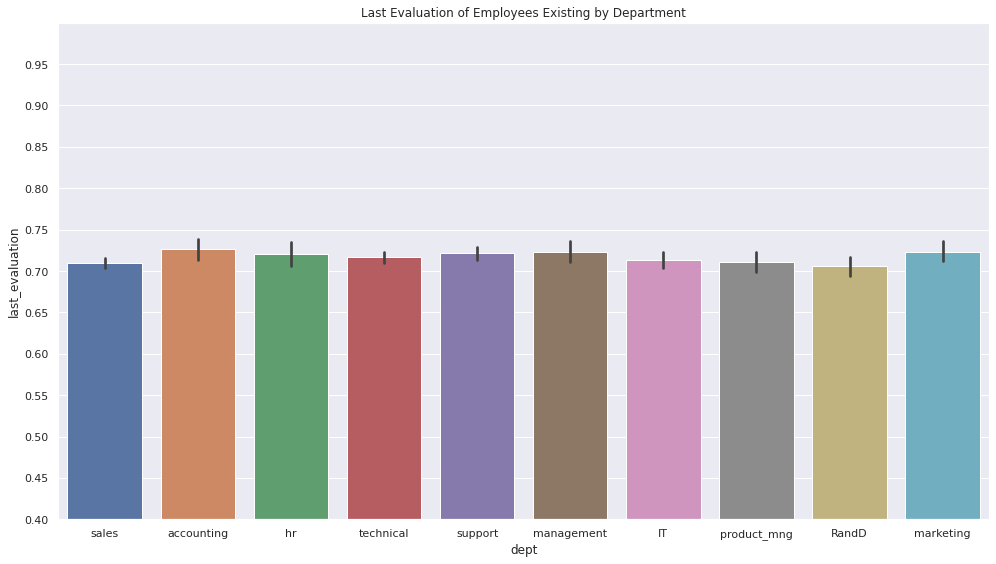

In [68]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='last_evaluation',data=exist)
plt.title("Last Evaluation of Employees Existing by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

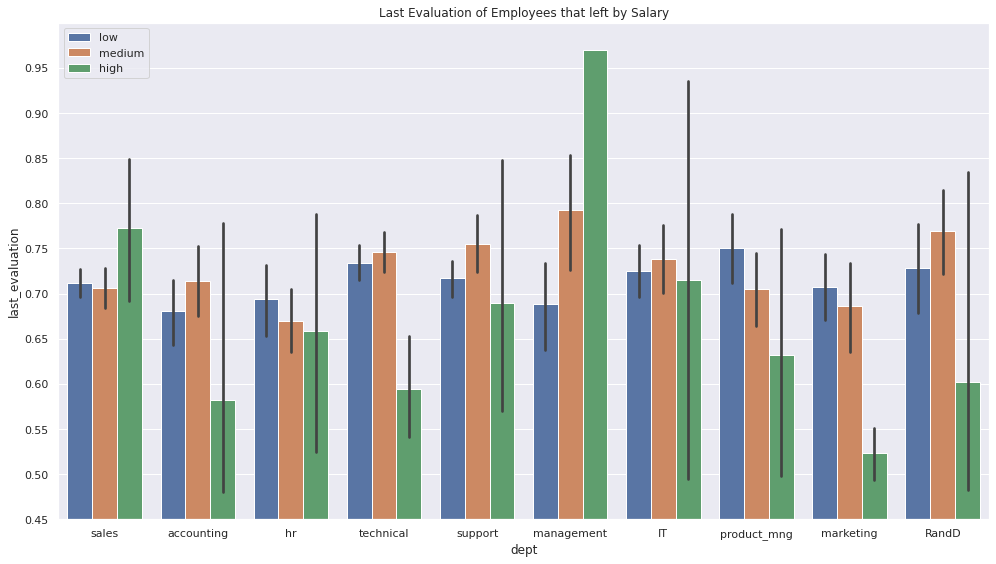

In [69]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='last_evaluation',hue='salary',data=left)
plt.title("Last Evaluation of Employees that left by Salary")
plt.ylim([0.45,1])
plt.yticks(np.arange(0.45, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

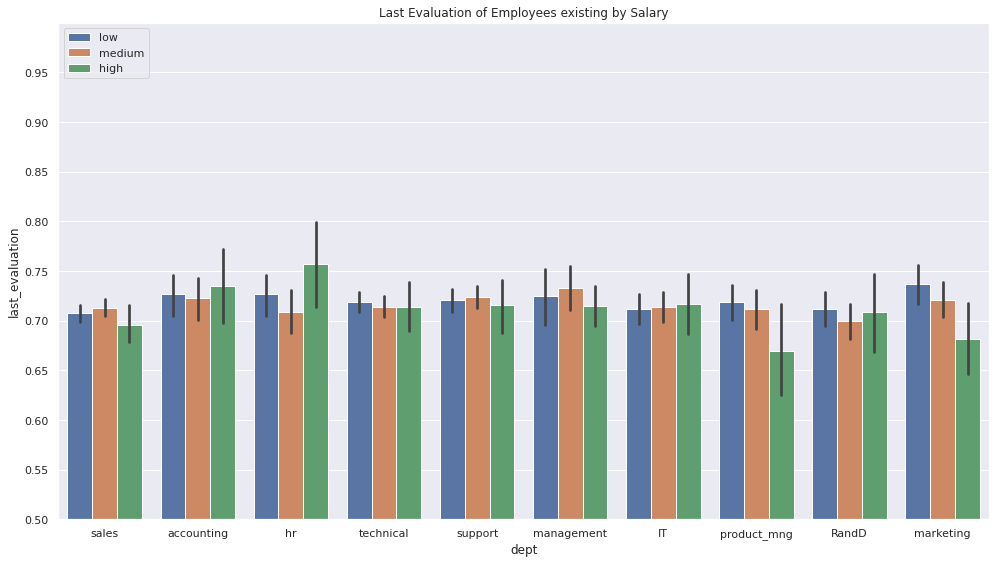

In [70]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='last_evaluation',hue='salary',data=exist)
plt.title("Last Evaluation of Employees existing by Salary")
plt.ylim([0.5,1])
plt.yticks(np.arange(0.5, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

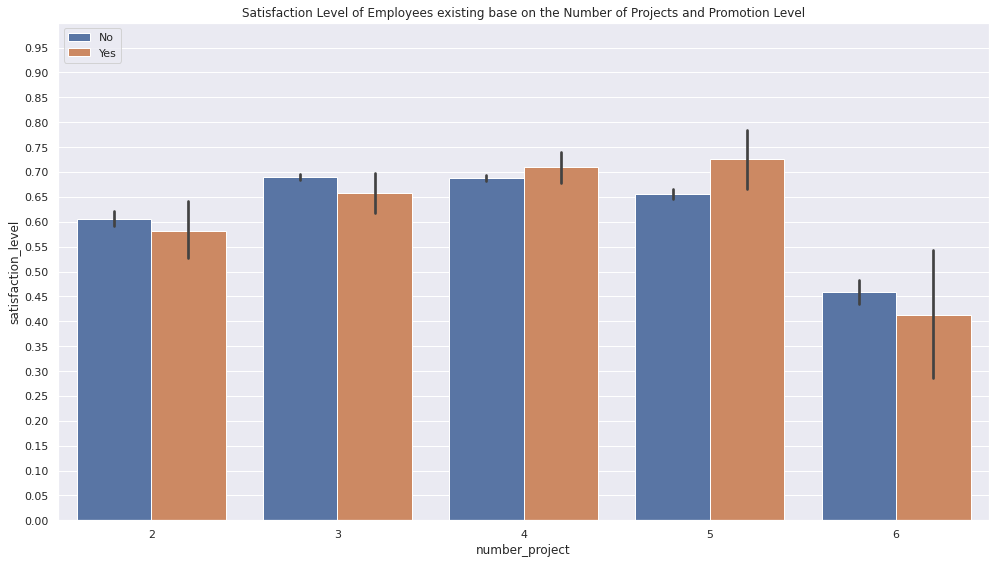

In [71]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.barplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=exist)
plt.title("Satisfaction Level of Employees existing base on the Number of Projects and Promotion Level")
plt.tight_layout()
plt.legend(loc=2)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

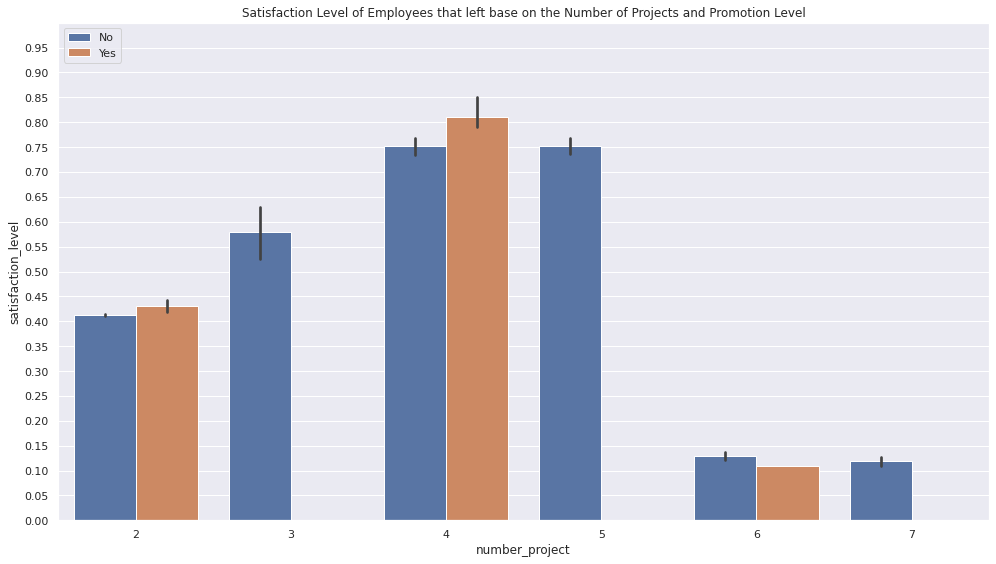

In [72]:
plt.figure(figsize=(14,8))
sns.barplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=left)
plt.title("Satisfaction Level of Employees that left base on the Number of Projects and Promotion Level")
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

In [73]:
#Employees that left
low_income= left[left['salary'] =='low']
medium_income = left[left['salary']=='medium']
high_income = left[left['salary']=='high']

#Exist Employees
low_income1= exist[exist['salary'] =='low']
medium_income1 = exist[exist['salary']=='medium']
high_income1 = exist[exist['salary']=='high']

Text(0.5, 0, 'Satisfaction level')

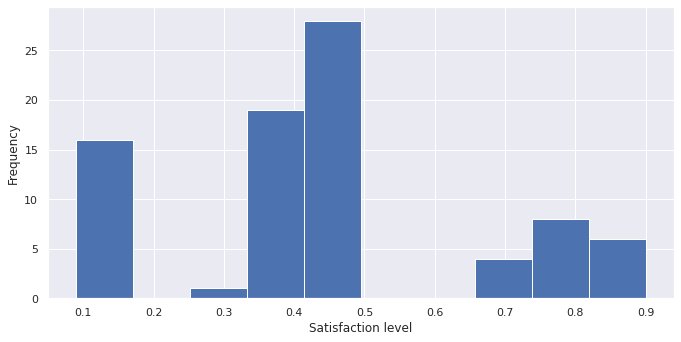

In [74]:
plt.figure(figsize=(10,5))
high_income['satisfaction_level'].plot.hist()
plt.xlabel('Satisfaction level')

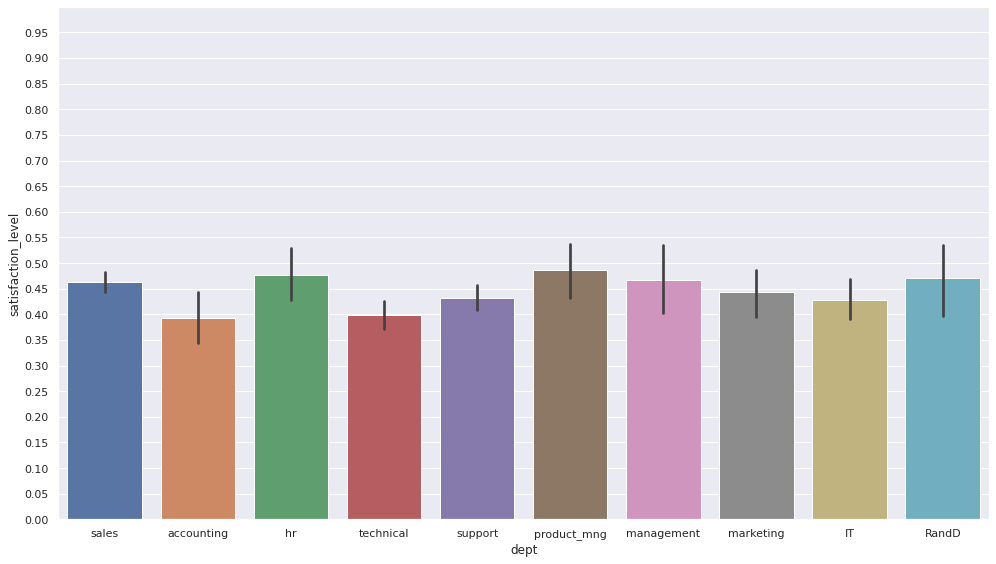

In [75]:
plt.figure(figsize=(14,8))
sns.barplot(x='dept',y='satisfaction_level',data=low_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

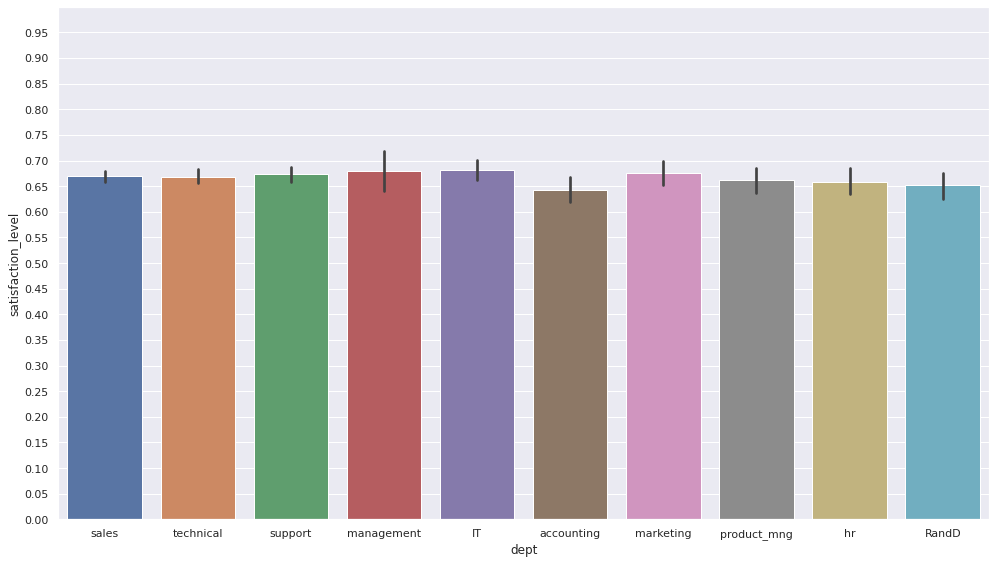

In [76]:
plt.figure(figsize=(14,8))
sns.barplot(x='dept',y='satisfaction_level',data=low_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

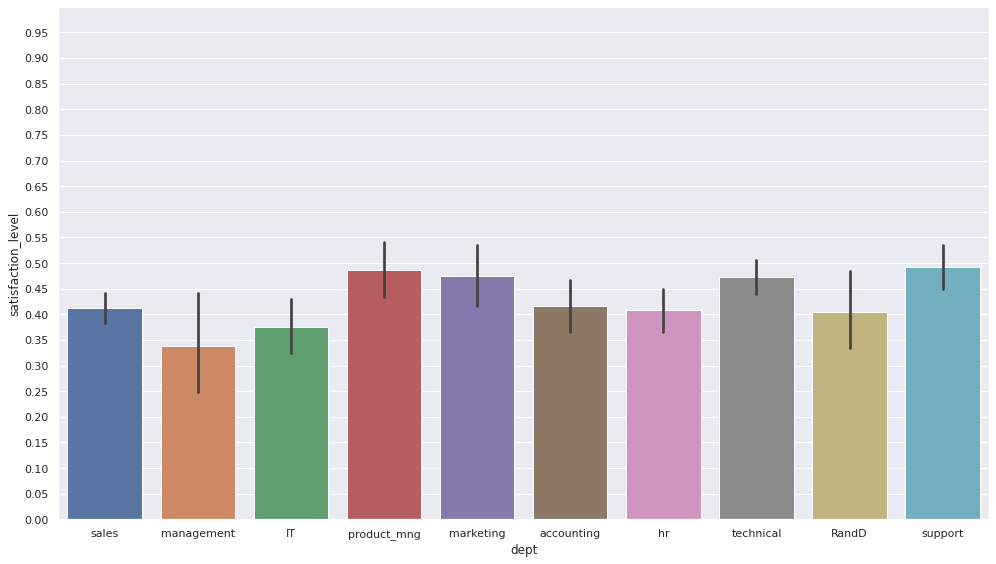

In [77]:
plt.figure(figsize=(14,8))
sns.barplot(x='dept',y='satisfaction_level',data=medium_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

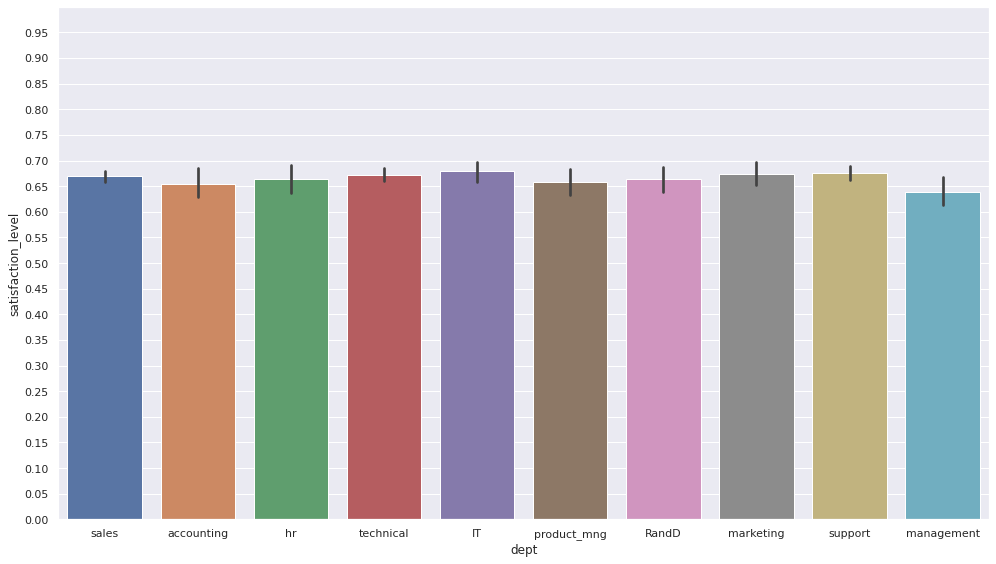

In [78]:
plt.figure(figsize=(14,8))
sns.barplot(x='dept',y='satisfaction_level',data=medium_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

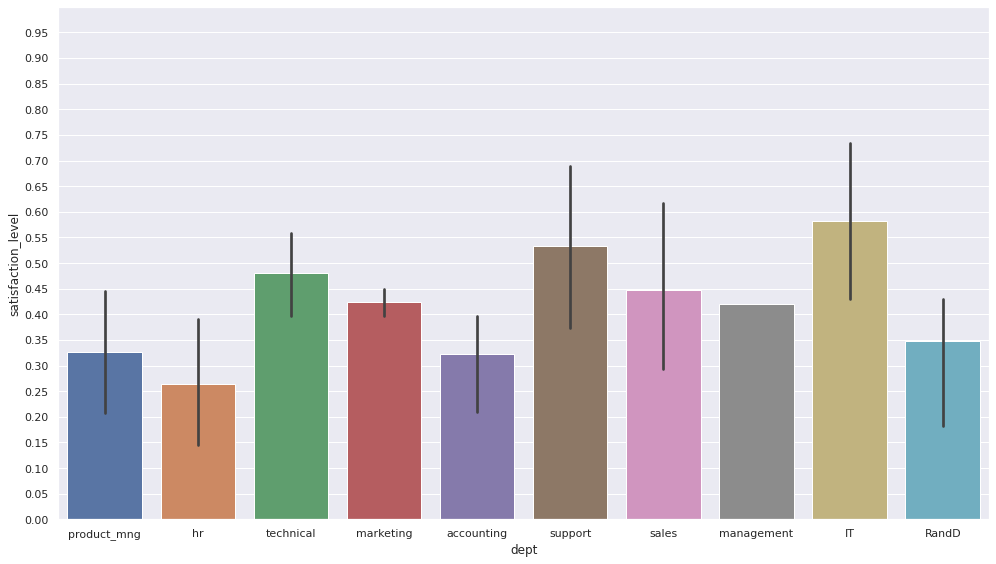

In [79]:
plt.figure(figsize=(14,8))
sns.barplot(x='dept',y='satisfaction_level',data=high_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

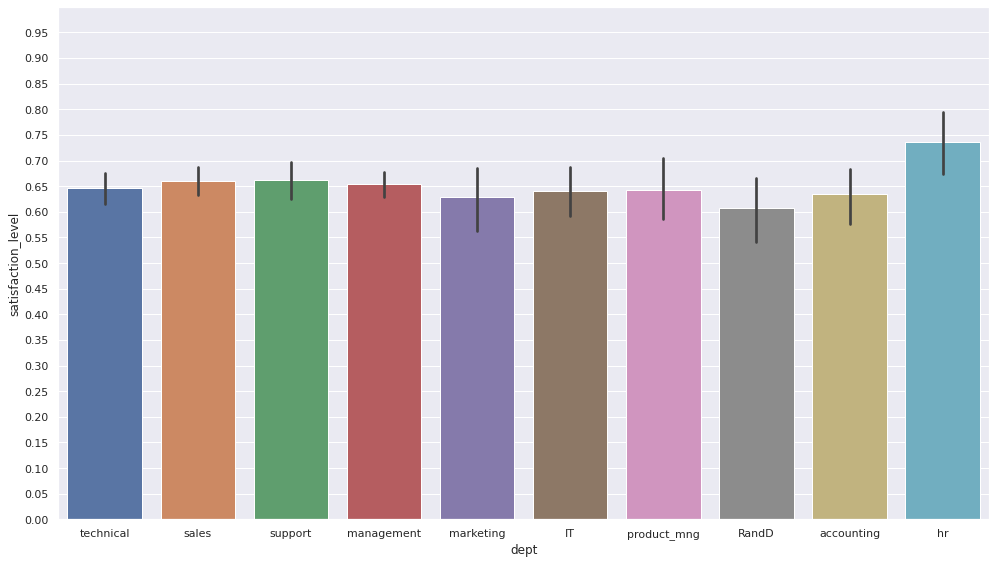

In [80]:
plt.figure(figsize=(14,8))
sns.barplot(x='dept',y='satisfaction_level',data=high_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

Text(0.5, 1.0, 'Satisfaction Level of employees that left base on Salary and Work accident')

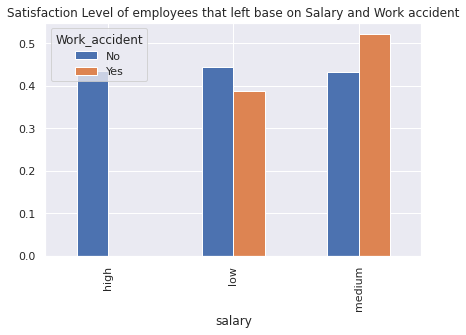

In [81]:
Acci_left =left.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Acci_left.plot.bar()
plt.title("Satisfaction Level of employees that left base on Salary and Work accident")

Text(0.5, 1.0, 'Satisfaction Level of employees existing base on Salary and Work accident')

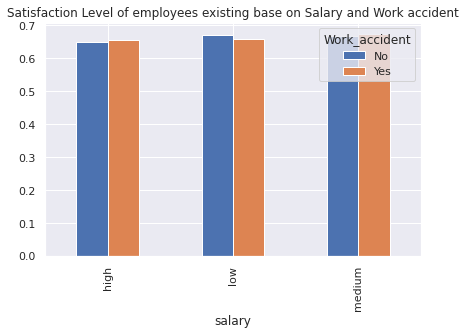

In [82]:
Acci_exist =exist.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Acci_exist.plot.bar()
plt.title("Satisfaction Level of employees existing base on Salary and Work accident")

Text(0, 0.5, 'Satisfaction Level')

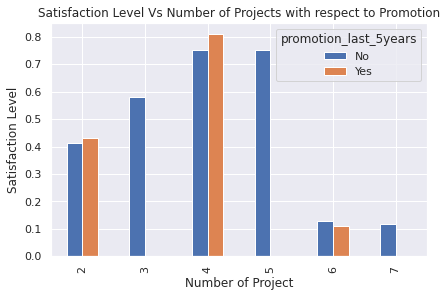

In [83]:
proj_left =left.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
proj_left.plot.bar()
plt.title("Satisfaction Level Vs Number of Projects with respect to Promotion")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")

Text(0, 0.5, 'Satisfaction Level')

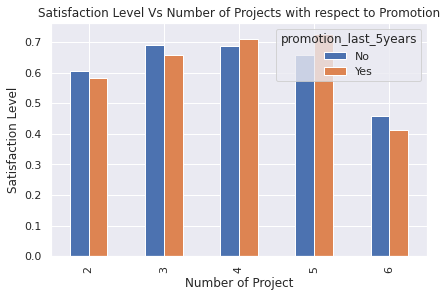

In [84]:
proj_exist =exist.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
proj_exist.plot.bar()
plt.title("Satisfaction Level Vs Number of Projects with respect to Promotion")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")